In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

In [8]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []

# 设置一个起点为np.min(decision_scores)，终点是np.max(decision_scores)，步长为0.1的数组
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

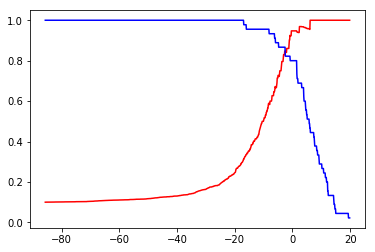

In [9]:
plt.plot(thresholds, precisions, color="r", label="precision")
plt.plot(thresholds, recalls, color="b", label="recall")

## Precision-Recall 曲线

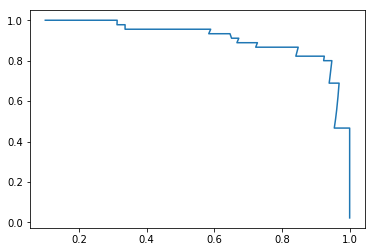

In [10]:
plt.plot(precisions, recalls)

## sklearn中Precision-Recall 曲线

In [11]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [12]:
precisions.shape

(145,)

In [13]:
recalls.shape

(145,)

In [14]:
thresholds.shape

(144,)

我们观察发现，thresholds 要比 precisions 和 recalls 少一个值

我们查阅sklearn相关文档
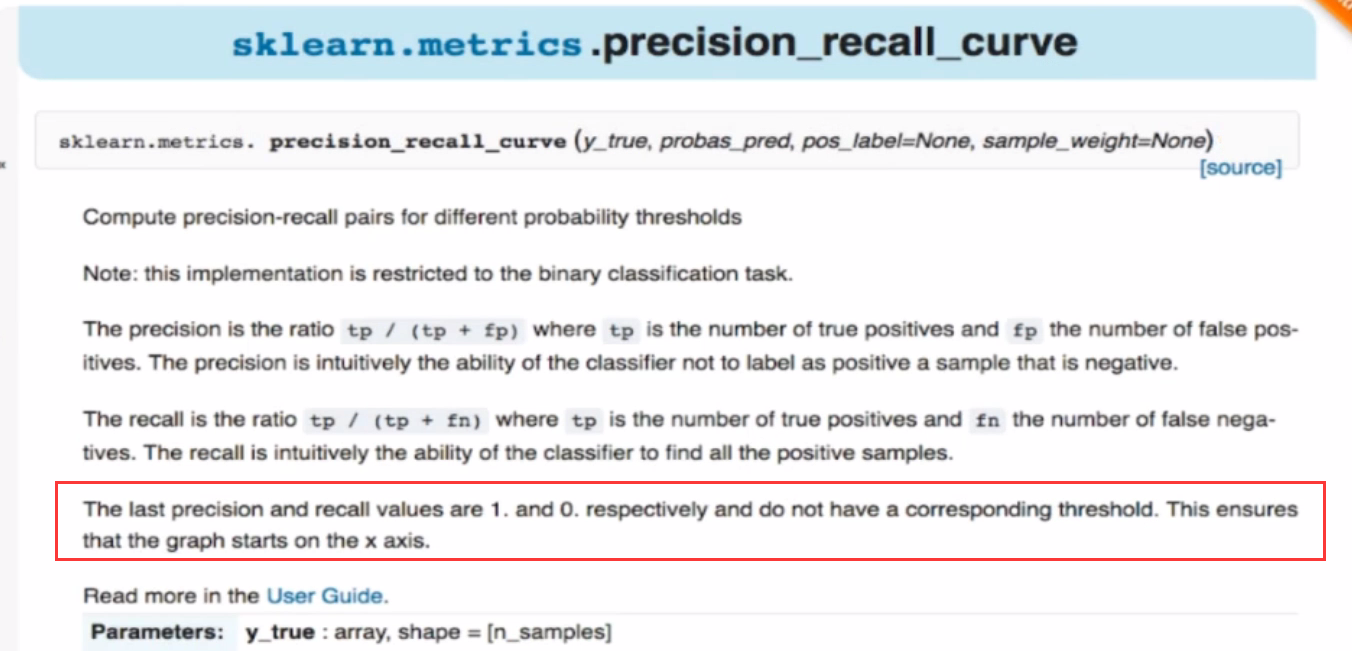

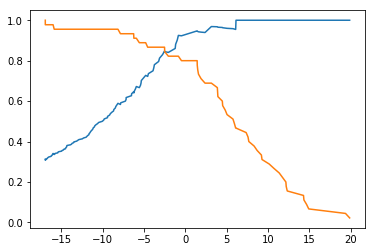

In [15]:
plt.plot(thresholds, precisions[:-1]) # precisions[:-1] 去掉最后一个值
plt.plot(thresholds, recalls[:-1])

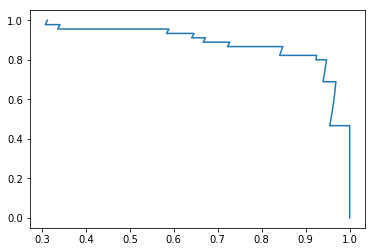

In [16]:
plt.plot(precisions, recalls)